## Prediction Problem - Predict the probability that somebody will experience financial distress in the next two years. Goal - Use the outputted value by the model and convert it to a FICO style score.

In [1]:
import numpy as np
import pickle

In [2]:
import pandas as pd
df = pd.read_csv("data/cs-training.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
pd.crosstab(df.age, df.NumberOfDependents)


NumberOfDependents,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,13.0,20.0
age,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,0,0,0
21,148,3,1,0,0,0,0,0,0,0,0,0,0
22,385,7,2,2,0,0,0,0,0,0,0,0,0
23,550,33,13,3,0,0,0,0,0,0,0,0,0
24,689,48,19,3,1,0,0,0,0,0,0,0,0
25,774,91,31,7,5,1,0,0,0,0,0,0,0
26,946,128,56,14,4,0,0,0,0,0,0,0,0
27,1001,192,53,32,4,0,0,0,0,0,0,0,0
28,1142,210,114,45,8,1,0,0,0,0,0,0,0


## Basic Cleanling - Converting each column name to camel case.

In [4]:
import re
def camel_to_snake(column_name):
    """
    converts a string that is camelCase into snake_case
    Example:
        print camel_to_snake("javaLovesCamelCase")
        > java_loves_camel_case
    Reference:
        http://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-camel-case
    """
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [5]:
df.columns = [camel_to_snake(col) for col in df.columns]
collist = df.columns.tolist()[1:]
collist

['serious_dlqin2yrs',
 'revolving_utilization_of_unsecured_lines',
 'age',
 'number_of_time30-59_days_past_due_not_worse',
 'debt_ratio',
 'monthly_income',
 'number_of_open_credit_lines_and_loans',
 'number_of_times90_days_late',
 'number_real_estate_loans_or_lines',
 'number_of_time60-89_days_past_due_not_worse',
 'number_of_dependents']

## Handling Missing Values

In [6]:
# By not specifying id_vars, we're going to melt EVERYTHING
df_lng = pd.melt(df[collist])
# now our data is a series of (key, value) rows. 
#think of when you've done this in Excel so that you can
#create a pivot table 
df_lng.head()
df_lng.tail()

,variable,value
1649995,number_of_dependents,0.0
1649996,number_of_dependents,2.0
1649997,number_of_dependents,0.0
1649998,number_of_dependents,0.0
1649999,number_of_dependents,0.0


In [7]:
null_variables = df_lng.value.isnull()
null_variables.sum()

33655

In [8]:
# crosstab creates a frequency table between 2 variables
# it's going to automatically enumerate the possibilities between
# the two Series and show you a count of occurrences 
#in each possible bucket
def print_null_freq(df):
    """
    for a given DataFrame, calculates how many values for 
    each variable is null and prints the resulting table to stdout
    """
    df_lng = pd.melt(df)
    null_variables = df_lng.value.isnull()
    return pd.crosstab(df_lng.variable, null_variables)
print_null_freq(df)

value,False,True
variable,,
age,150000,0
debt_ratio,150000,0
monthly_income,120269,29731
number_of_dependents,146076,3924
number_of_open_credit_lines_and_loans,150000,0
number_of_time30-59_days_past_due_not_worse,150000,0
number_of_time60-89_days_past_due_not_worse,150000,0
number_of_times90_days_late,150000,0
number_real_estate_loans_or_lines,150000,0


In [9]:
df.number_of_dependents = df.number_of_dependents.fillna(0)
print_null_freq(df)

value,False,True
variable,,
age,150000,0
debt_ratio,150000,0
monthly_income,120269,29731
number_of_dependents,150000,0
number_of_open_credit_lines_and_loans,150000,0
number_of_time30-59_days_past_due_not_worse,150000,0
number_of_time60-89_days_past_due_not_worse,150000,0
number_of_times90_days_late,150000,0
number_real_estate_loans_or_lines,150000,0


In [10]:
df.number_of_dependents.unique()

array([ 2.,  1.,  0.,  3.,  4.,  5.,  6.,  8.,  7., 20., 10.,  9., 13.])

In [11]:
df.to_csv("data/credit-data-post-import.csv", index=False)

## Imputation

To do this we're going to use the NearestNeighbors algorithm.

In [12]:
of = pd.read_csv("./data/credit-data-post-import.csv")
df = of[collist]

## Cross Validation

We're going to use the simplest type of cross validation. we'll simply split our data into 2 groups: training and test. we'll use the training set to calibrate our model and then use the test set to evaluate how effective it is.

In [13]:
is_test = np.random.uniform(0, 1, len(df)) > 0.75
train = df[is_test==False]
test = df[is_test==True]

In [14]:
from sklearn.neighbors import KNeighborsRegressor

income_imputer = KNeighborsRegressor(n_neighbors=1)

# split our data into 2 groups; data containing nulls and data 
# not containing nulls we'll train on the latter and make
# 'predictions' on the null data to impute monthly_income
train_w_monthly_income = train[train.monthly_income.isnull()==False]
train_w_null_monthly_income = train[train.monthly_income.isnull()==True]
train_w_monthly_income.corr().ix[:,5]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # Remove the CWD from sys.path while we load stuff.


serious_dlqin2yrs                             -0.019266
revolving_utilization_of_unsecured_lines       0.008829
age                                            0.037953
number_of_time30-59_days_past_due_not_worse   -0.010034
debt_ratio                                    -0.030772
monthly_income                                 1.000000
number_of_open_credit_lines_and_loans          0.092511
number_of_times90_days_late                   -0.012884
number_real_estate_loans_or_lines              0.125291
number_of_time60-89_days_past_due_not_worse   -0.011146
number_of_dependents                           0.065564
Name: monthly_income, dtype: float64

In [15]:
cols = ['number_real_estate_loans_or_lines', 'number_of_open_credit_lines_and_loans']
income_imputer.fit(train_w_monthly_income[cols], train_w_monthly_income.monthly_income)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [16]:
new_values = income_imputer.predict(train_w_null_monthly_income[cols])
train_w_null_monthly_income['monthly_income'] = new_values
new_values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([31666.,  3500.,  8000., ...,  4000.,  3960.,  3960.])

In [17]:
#combine the data back together
train = train_w_monthly_income.append(train_w_null_monthly_income)

In [18]:
test['monthly_income_imputed'] = income_imputer.predict(test[cols])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
test['monthly_income'] = np.where(test.monthly_income.isnull(), test.monthly_income_imputed,
                                  test.monthly_income)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import pylab as pl
train.to_csv("./data/credit-data-trainingset.csv", index=False)
test.to_csv("./data/credit-data-testset.csv", index=False)

In [21]:
features = ['revolving_utilization_of_unsecured_lines', 'debt_ratio',
            'monthly_income', 'age', 'number_of_times90_days_late']

clf = KNeighborsClassifier(n_neighbors=13)

In [22]:
clf.fit(train[features], train.serious_dlqin2yrs)
#classes (returns an array)
clf.predict(test[features])


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
knn_pkl = open("knn_gmsc.pkl", 'wb')
pickle.dump(clf, knn_pkl)
knn_pkl.close()

In [24]:
probs = clf.predict_proba(test[features])
#prob_true = probs[::,1]
#pl.hist(prob_true)
probs

array([[1.        , 0.        ],
       [0.84615385, 0.15384615],
       [0.92307692, 0.07692308],
       ...,
       [1.        , 0.        ],
       [0.92307692, 0.07692308],
       [1.        , 0.        ]])

In [25]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
preds = clf.predict_proba(test[features])

In [26]:
pd.crosstab(test['serious_dlqin2yrs'], clf.predict(test[features]), rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,34777,22
1,2486,24


In [28]:
print(classification_report(test['serious_dlqin2yrs'], clf.predict(test[features]), labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.93      1.00      0.97     34799
          1       0.52      0.01      0.02      2510

avg / total       0.91      0.93      0.90     37309



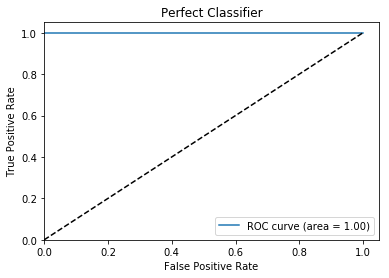

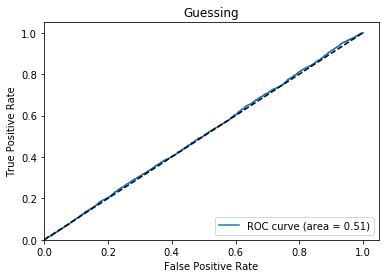

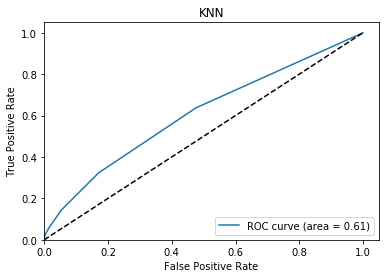

In [29]:
def plot_roc(name, probs):
    fpr, tpr, thresholds = roc_curve(test['serious_dlqin2yrs'], probs)
    roc_auc = auc(fpr, tpr)
    pl.clf()
    pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    pl.plot([0, 1], [0, 1], 'k--')
    pl.xlim([0.0, 1.05])
    pl.ylim([0.0, 1.05])
    pl.xlabel('False Positive Rate')
    pl.ylabel('True Positive Rate')
    pl.title(name)
    pl.legend(loc="lower right")
    pl.show()
plot_roc("Perfect Classifier", test['serious_dlqin2yrs'])
plot_roc("Guessing", np.random.uniform(0, 1, len(test['serious_dlqin2yrs'])))

#[::,1] selects the 2nd column of the numpy array
plot_roc("KNN", preds[::,1])


## RANDOMFOREST

             precision    recall  f1-score   support

          0       0.94      0.99      0.96     34799
          1       0.49      0.15      0.23      2510

avg / total       0.91      0.93      0.91     37309



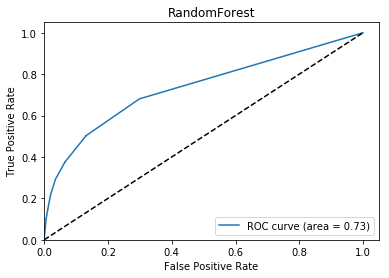

In [30]:
clf = RandomForestClassifier()
clf.fit(train[features], train.serious_dlqin2yrs)
probs = clf.predict_proba(test[features])[::,1]
print(classification_report(test['serious_dlqin2yrs'], clf.predict(test[features]), labels=[0, 1]))
plot_roc("RandomForest", probs)

In [31]:
rf_pkl = open("rf_gmsc.pkl", 'wb')
pickle.dump(clf, rf_pkl)
rf_pkl.close()

## GRADIENT BOOSTING CLASSIFIER

In [32]:
features = ['revolving_utilization_of_unsecured_lines', 'debt_ratio',
            'number_of_times90_days_late', 'number_real_estate_loans_or_lines']

In [33]:
finaltest = pd.read_csv("data/cs-test.csv")

In [34]:
finaltest.columns = [camel_to_snake(col) for col in finaltest.columns]
coltest = finaltest.columns.tolist()[1:]
coltest

['serious_dlqin2yrs',
 'revolving_utilization_of_unsecured_lines',
 'age',
 'number_of_time30-59_days_past_due_not_worse',
 'debt_ratio',
 'monthly_income',
 'number_of_open_credit_lines_and_loans',
 'number_of_times90_days_late',
 'number_real_estate_loans_or_lines',
 'number_of_time60-89_days_past_due_not_worse',
 'number_of_dependents']

In [35]:
clf = GradientBoostingClassifier()
clf.fit(train[features], train.serious_dlqin2yrs)
probs = clf.predict_proba(test[features])[::,1]
print(classification_report(test['serious_dlqin2yrs'], clf.predict(test[features]), labels=[0, 1]))


             precision    recall  f1-score   support

          0       0.94      0.99      0.97     34799
          1       0.59      0.15      0.24      2510

avg / total       0.92      0.94      0.92     37309



In [36]:
gbc_pkl = open("gbc_gmsc.pkl", 'wb')
pickle.dump(clf, gbc_pkl)
gbc_pkl.close()

In [37]:
clf.predict(test[features])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

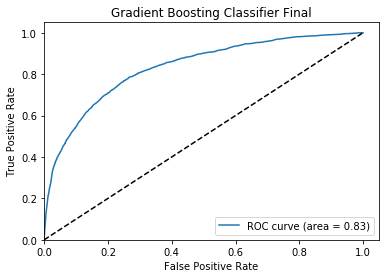

In [38]:
plot_roc("Gradient Boosting Classifier Final", probs)


In [40]:
f = clf.predict(a)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [41]:
f[0]

1

In [42]:
features

['revolving_utilization_of_unsecured_lines',
 'debt_ratio',
 'number_of_times90_days_late',
 'number_real_estate_loans_or_lines']

# Logistic Regression


             precision    recall  f1-score   support

          0       0.93      1.00      0.97     34799
          1       0.50      0.01      0.02      2510

avg / total       0.90      0.93      0.90     37309



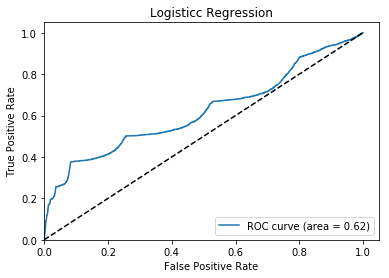

In [40]:

clf = LogisticRegression()
clf.fit(train[features], train.serious_dlqin2yrs)
probs = clf.predict_proba(test[features])[::,1]
print(classification_report(test['serious_dlqin2yrs'], clf.predict(test[features]), labels=[0, 1]))
plot_roc("Logisticc Regression", probs)

# Logistic regression on different features 

In [41]:
features = ['revolving_utilization_of_unsecured_lines', 'debt_ratio',
            'monthly_income', 'age', 'number_of_times90_days_late']


             precision    recall  f1-score   support

          0       0.93      1.00      0.97     34799
          1       0.47      0.01      0.02      2510

avg / total       0.90      0.93      0.90     37309



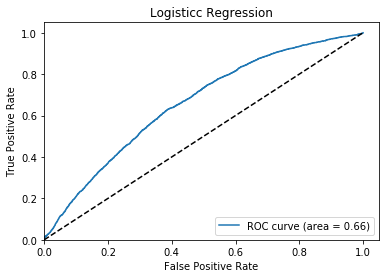

In [42]:

clf = LogisticRegression()
clf.fit(train[features], train.serious_dlqin2yrs)
probs = clf.predict_proba(test[features])[::,1]
print(classification_report(test['serious_dlqin2yrs'], clf.predict(test[features]), labels=[0, 1]))
plot_roc("Logisticc Regression", probs)

Future Work - Models can be made better to give good f1 score for now we are leaving this as we are more concern about the web application here.